# This notebook is to learn to use word2vec
(https://code.google.com/archive/p/word2vec/)

In [1]:
import gzip
import re
from gensim.models import Word2Vec
from gensim.models import KeyedVectors
import logging
from sqlalchemy import create_engine
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

from sklearn.decomposition import PCA

logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', level=logging.INFO)

In [2]:
database_path = '../data/DisasterResponse.db'
MESSAGES_TABLE = 'messages'

In [3]:
model = Word2Vec()

In [4]:
def load_data(database_filepath):
    """
    Get the data from the database.

    Args:
        database_filepath(str): The path of the sqlite database.

    Returns:
        X(pandas.DataFrame): The input messages to classify.
        y(pandas.DataFrame): The desired output labels.
        category_names(list(str)): The names of the labels' categories.
    """
    engine = create_engine('sqlite:///{}'.format(database_filepath))
    df = pd.read_sql_table(MESSAGES_TABLE, engine)
    X = df.loc[:, 'message']
    y = df.iloc[:, 4:]
    category_names = y.columns.tolist()
    
    return X, y, category_names

In [5]:
X, y, category_names = load_data(database_path)

In [6]:
X.head()

0    Weather update - a cold front from Cuba that c...
1              Is the Hurricane over or is it not over
2                      Looking for someone but no name
3    UN reports Leogane 80-90 destroyed. Only Hospi...
4    says: west side of Haiti, rest of the country ...
Name: message, dtype: object

In [7]:
def tokenize(text):
    """ Basic tokenization function. """
    # Case normalization
    temp_text = text.lower()

    # Punctuation removal
    temp_text = re.sub(r'[^a-zA-Z0-9]', ' ', temp_text)

    # Tokenize
    tokens = word_tokenize(temp_text)

    # Stop Word Removal
    stop_words = stopwords.words("english")
    tokens = [word for word in tokens if word not in stop_words]
    
    return tokens

In [8]:
tokenize(X.iloc[0])

['weather', 'update', 'cold', 'front', 'cuba', 'could', 'pass', 'haiti']

### Let's first try a manual transfomation (without a Pipeline)

In [9]:
%time X_list = [tokenize(sentence) for sentence in X]

CPU times: user 15.9 s, sys: 15.3 s, total: 31.2 s
Wall time: 33.2 s


In [10]:
X_list[:10]

[['weather', 'update', 'cold', 'front', 'cuba', 'could', 'pass', 'haiti'],
 ['hurricane'],
 ['looking', 'someone', 'name'],
 ['un',
  'reports',
  'leogane',
  '80',
  '90',
  'destroyed',
  'hospital',
  'st',
  'croix',
  'functioning',
  'needs',
  'supplies',
  'desperately'],
 ['says', 'west', 'side', 'haiti', 'rest', 'country', 'today', 'tonight'],
 ['information', 'national', 'palace'],
 ['storm', 'sacred', 'heart', 'jesus'],
 ['please', 'need', 'tents', 'water', 'silo', 'thank'],
 ['would', 'like', 'receive', 'messages', 'thank'],
 ['croix',
  'des',
  'bouquets',
  'health',
  'issues',
  'workers',
  'santo',
  '15',
  'area',
  'croix',
  'des',
  'bouquets']]

In [11]:
%time w2v_transformer = Word2Vec(X_list, min_count=1)

2018-11-19 15:36:57,242 : INFO : collecting all words and their counts
2018-11-19 15:36:57,245 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2018-11-19 15:36:57,281 : INFO : PROGRESS: at sentence #10000, processed 83766 words, keeping 10003 word types
2018-11-19 15:36:57,353 : INFO : PROGRESS: at sentence #20000, processed 261507 words, keeping 28964 word types
2018-11-19 15:36:57,408 : INFO : collected 34929 word types from a corpus of 381984 raw words and 26216 sentences
2018-11-19 15:36:57,409 : INFO : Loading a fresh vocabulary
2018-11-19 15:36:57,577 : INFO : effective_min_count=1 retains 34929 unique words (100% of original 34929, drops 0)
2018-11-19 15:36:57,577 : INFO : effective_min_count=1 leaves 381984 word corpus (100% of original 381984, drops 0)
2018-11-19 15:36:57,701 : INFO : deleting the raw counts dictionary of 34929 items
2018-11-19 15:36:57,702 : INFO : sample=0.001 downsamples 16 most-common words
2018-11-19 15:36:57,703 : INFO : downsa

CPU times: user 8.14 s, sys: 142 ms, total: 8.28 s
Wall time: 3.95 s


In [12]:
print(w2v_transformer)

Word2Vec(vocab=34929, size=100, alpha=0.025)


In [13]:
words = list(w2v_transformer.wv.vocab)
print(words)

['weather', 'update', 'cold', 'front', 'cuba', 'could', 'pass', 'haiti', 'hurricane', 'looking', 'someone', 'name', 'un', 'reports', 'leogane', '80', '90', 'destroyed', 'hospital', 'st', 'croix', 'functioning', 'needs', 'supplies', 'desperately', 'says', 'west', 'side', 'rest', 'country', 'today', 'tonight', 'information', 'national', 'palace', 'storm', 'sacred', 'heart', 'jesus', 'please', 'need', 'tents', 'water', 'silo', 'thank', 'would', 'like', 'receive', 'messages', 'des', 'bouquets', 'health', 'issues', 'workers', 'santo', '15', 'area', 'nothing', 'eat', 'starving', 'thirsty', 'petionville', 'regarding', '4636', 'thomassin', 'number', '32', 'named', 'pyron', 'god', 'fine', 'thanks', 'let', 'together', 'food', 'delma', '75', 'didine', 'order', 'participate', 'see', 'use', 'comitee', 'delmas', '19', 'rue', 'street', 'janvier', 'impasse', 'charite', '2', '500', 'people', 'temporary', 'shelter', 'dire', 'medications', 'clothes', 'stop', 'us', 'klecin', '12', 'dying', 'hunger', 'chre

In [14]:
print(w2v_transformer['drink'])

[ 0.35244808 -0.47107813  0.05458111 -0.23146287  0.25331888 -0.5176393
 -0.35635033  0.1363434   0.63604695  0.23573416  0.43653062  0.17248663
 -0.4408382  -0.30975616 -0.09627969  0.29818413  0.18074699 -0.16238022
 -0.24720314 -0.05577186  0.15330237 -0.0331387  -0.16824737  0.05547618
 -0.29962346  0.06759983 -0.18145168 -0.8010934   0.00505512 -0.24521214
 -0.26142418  0.07434079  0.04334963  0.16521765 -0.33664212  0.6881113
 -0.15281253 -0.02229781  0.1235643  -0.08281601  0.09376717  0.7087533
  0.09055477  0.50994956 -0.06581054  0.35501525 -0.12565167  0.1551853
 -0.01720419 -0.01283307  0.0929663  -0.37190396 -0.13902473  0.16173542
 -0.21631274 -0.01839745  0.03030071 -0.24830116 -0.01614737  0.2159893
 -0.06618258 -0.21147817 -0.3638317  -0.1921934  -0.42706114 -0.07204549
 -0.5665396  -0.42327142  0.01330309  0.5169699  -0.10326508  0.30886078
  0.11157706 -0.18709047 -0.40306798 -0.04770442 -0.15865184 -0.13424243
 -0.01272684 -0.12567376 -0.2968646  -0.13308552  0.1217

/Users/antelinvestigacionydesarrollo/anaconda3/envs/data/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [15]:
w2v_transformer.save('w2v_transformer_1.bin')

2018-11-19 15:37:01,271 : INFO : saving Word2Vec object under w2v_transformer_1.bin, separately None
2018-11-19 15:37:01,274 : INFO : not storing attribute vectors_norm
2018-11-19 15:37:01,282 : INFO : not storing attribute cum_table
2018-11-19 15:37:01,710 : INFO : saved w2v_transformer_1.bin


In [16]:
new_transformer = Word2Vec.load('w2v_transformer_1.bin')

2018-11-19 15:37:01,720 : INFO : loading Word2Vec object from w2v_transformer_1.bin
2018-11-19 15:37:02,068 : INFO : loading wv recursively from w2v_transformer_1.bin.wv.* with mmap=None
2018-11-19 15:37:02,069 : INFO : setting ignored attribute vectors_norm to None
2018-11-19 15:37:02,069 : INFO : loading vocabulary recursively from w2v_transformer_1.bin.vocabulary.* with mmap=None
2018-11-19 15:37:02,070 : INFO : loading trainables recursively from w2v_transformer_1.bin.trainables.* with mmap=None
2018-11-19 15:37:02,071 : INFO : setting ignored attribute cum_table to None
2018-11-19 15:37:02,074 : INFO : loaded w2v_transformer_1.bin


In [17]:
print(new_transformer)

Word2Vec(vocab=34929, size=100, alpha=0.025)


In [18]:
X_tr = w2v_transformer[w2v_transformer.wv.vocab]

/Users/antelinvestigacionydesarrollo/anaconda3/envs/data/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


In [19]:
pca = PCA(n_components=2)
result = pca.fit_transform(X_tr)

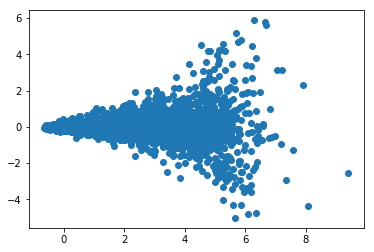

In [20]:
plt.scatter(result[:, 0], result[:, 1])

/Users/antelinvestigacionydesarrollo/anaconda3/envs/data/lib/python3.6/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


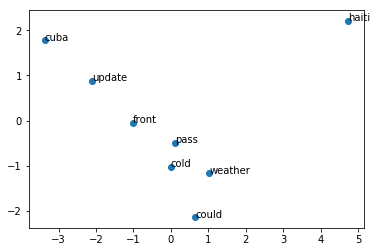

In [21]:
X_tr = w2v_transformer[X_list[0]]
result = pca.fit_transform(X_tr)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(X_list[0]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [22]:
filename = '../data/GoogleNews-vectors-negative300.bin'
model = KeyedVectors.load_word2vec_format(filename, binary=True)

2018-11-19 15:37:03,227 : INFO : loading projection weights from ../data/GoogleNews-vectors-negative300.bin
2018-11-19 15:38:06,020 : INFO : loaded (3000000, 300) matrix from ../data/GoogleNews-vectors-negative300.bin


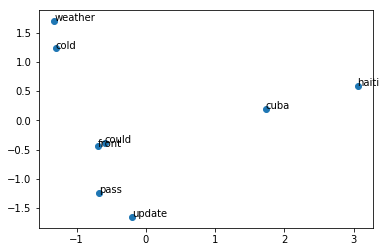

In [23]:
X_tr = model[X_list[0]]
result = pca.fit_transform(X_tr)
plt.scatter(result[:, 0], result[:, 1])
for i, word in enumerate(X_list[0]):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

In [24]:
from tqdm import tqdm

In [27]:
X_tr = list()
for sentence in tqdm(X_list):
    sentence_tr = list()
    for word in sentence:
        try:
            sentence_tr.append(model[word])
        except KeyError:
            pass
    X_tr.append(sentence_tr)

100%|██████████| 26216/26216 [00:01<00:00, 14811.15it/s]
